<a href="https://colab.research.google.com/github/tmq24/MachineLearning/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem.
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

| Biến                        | Mô tả                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| `BALANCE`                   | Số dư còn lại trong tài khoản để thực hiện mua sắm                  |
| `BALANCE_FREQUENCY`         | Tần suất cập nhật số dư, giá trị từ 0 đến 1 (1 = cập nhật thường xuyên) |
| `PURCHASES`                 | Tổng số tiền đã mua sắm từ tài khoản                                |
| `ONEOFF_PURCHASES`          | Giá trị lớn nhất của một lần mua hàng đơn lẻ                        |
| `INSTALLMENTS_PURCHASES`    | Tổng giá trị mua hàng theo hình thức trả góp                        |
| `CASH_ADVANCE`              | Số tiền mặt được ứng trước bởi người dùng                           |
| `PURCHASES_FREQUENCY`       | Tần suất thực hiện các giao dịch mua sắm (0 đến 1)                  |
| `ONEOFF_PURCHASES_FREQUENCY`| Tần suất thực hiện các giao dịch mua đơn lẻ (0 đến 1)               |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Tần suất mua hàng trả góp (0 đến 1)                          |
| `CASH_ADVANCE_FREQUENCY`    | Tần suất ứng trước tiền mặt (0 đến 1)                               |
| `CASH_ADVANCE_TRX`          | Số lượng giao dịch ứng trước tiền mặt                               |
| `PURCHASES_TRX`             | Số lượng giao dịch mua hàng                                         |
| `CREDIT_LIMIT`              | Hạn mức tín dụng của thẻ đối với người dùng                         |
| `PAYMENTS`                  | Tổng số tiền người dùng đã thanh toán                               |
| `MINIMUM_PAYMENTS`          | Khoản thanh toán tối thiểu người dùng đã trả                        |
| `PRC_FULL_PAYMENT`          | Tỷ lệ phần trăm thanh toán toàn bộ nợ                              |
| `TENURE`                    | Thời gian sử dụng thẻ tín dụng của người dùng                       |


**Chỉ dùng các features trên để phân cụm**

# Load Dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
import gdown

url = f"https://drive.google.com/uc?id=11miqjI1fuHD7EcRv84jDGVWDchuLZCgB"
output = "Clustered_Customer_Data.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=11miqjI1fuHD7EcRv84jDGVWDchuLZCgB
To: /content/Clustered_Customer_Data.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 89.0MB/s]


'Clustered_Customer_Data.csv'

In [ ]:
df = pd.read_csv("/content/Clustered_Customer_Data.csv", index_col=0)

In [ ]:
display(df.head())
print(f"Dataset shape: {df.shape}")

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


Dataset shape: (8950, 18)


# Data Analysis

In [ ]:
def data_analysis(df):
    print("\n=== Data types ===")
    display(df.dtypes)
    print("\n=== Missing values ===")
    print(df.isnull().sum())
    print("\n=== Descriptive statistics ===")
    display(df.describe())
    print("\n=== Duplicate rows ===")
    print(df.duplicated().sum())
    print("\n=== Unique values in each column ===")
    for column in df.columns:
        print(f"\n{column}:", df[column].unique())
    return df

df = data_analysis(df)


=== Data types ===


,0
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64
CASH_ADVANCE_FREQUENCY,float64



=== Missing values ===
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Cluster                             0
dtype: int64

=== Descriptive statistics ===


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000



=== Duplicate rows ===
0

=== Unique values in each column ===

BALANCE: [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]

BALANCE_FREQUENCY: [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]

PURCHASES: [  95.4     0.    773.17 ...  291.12  144.4  1093.25]

ONEOFF_PURCHASES: [   0.    773.17 1499.   ...  734.4  1012.73 1093.25]

INSTALLMENTS_PURCHASES: [  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]

CASH_ADVANCE: [   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]

PURCHASES_FREQUENCY: [0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.

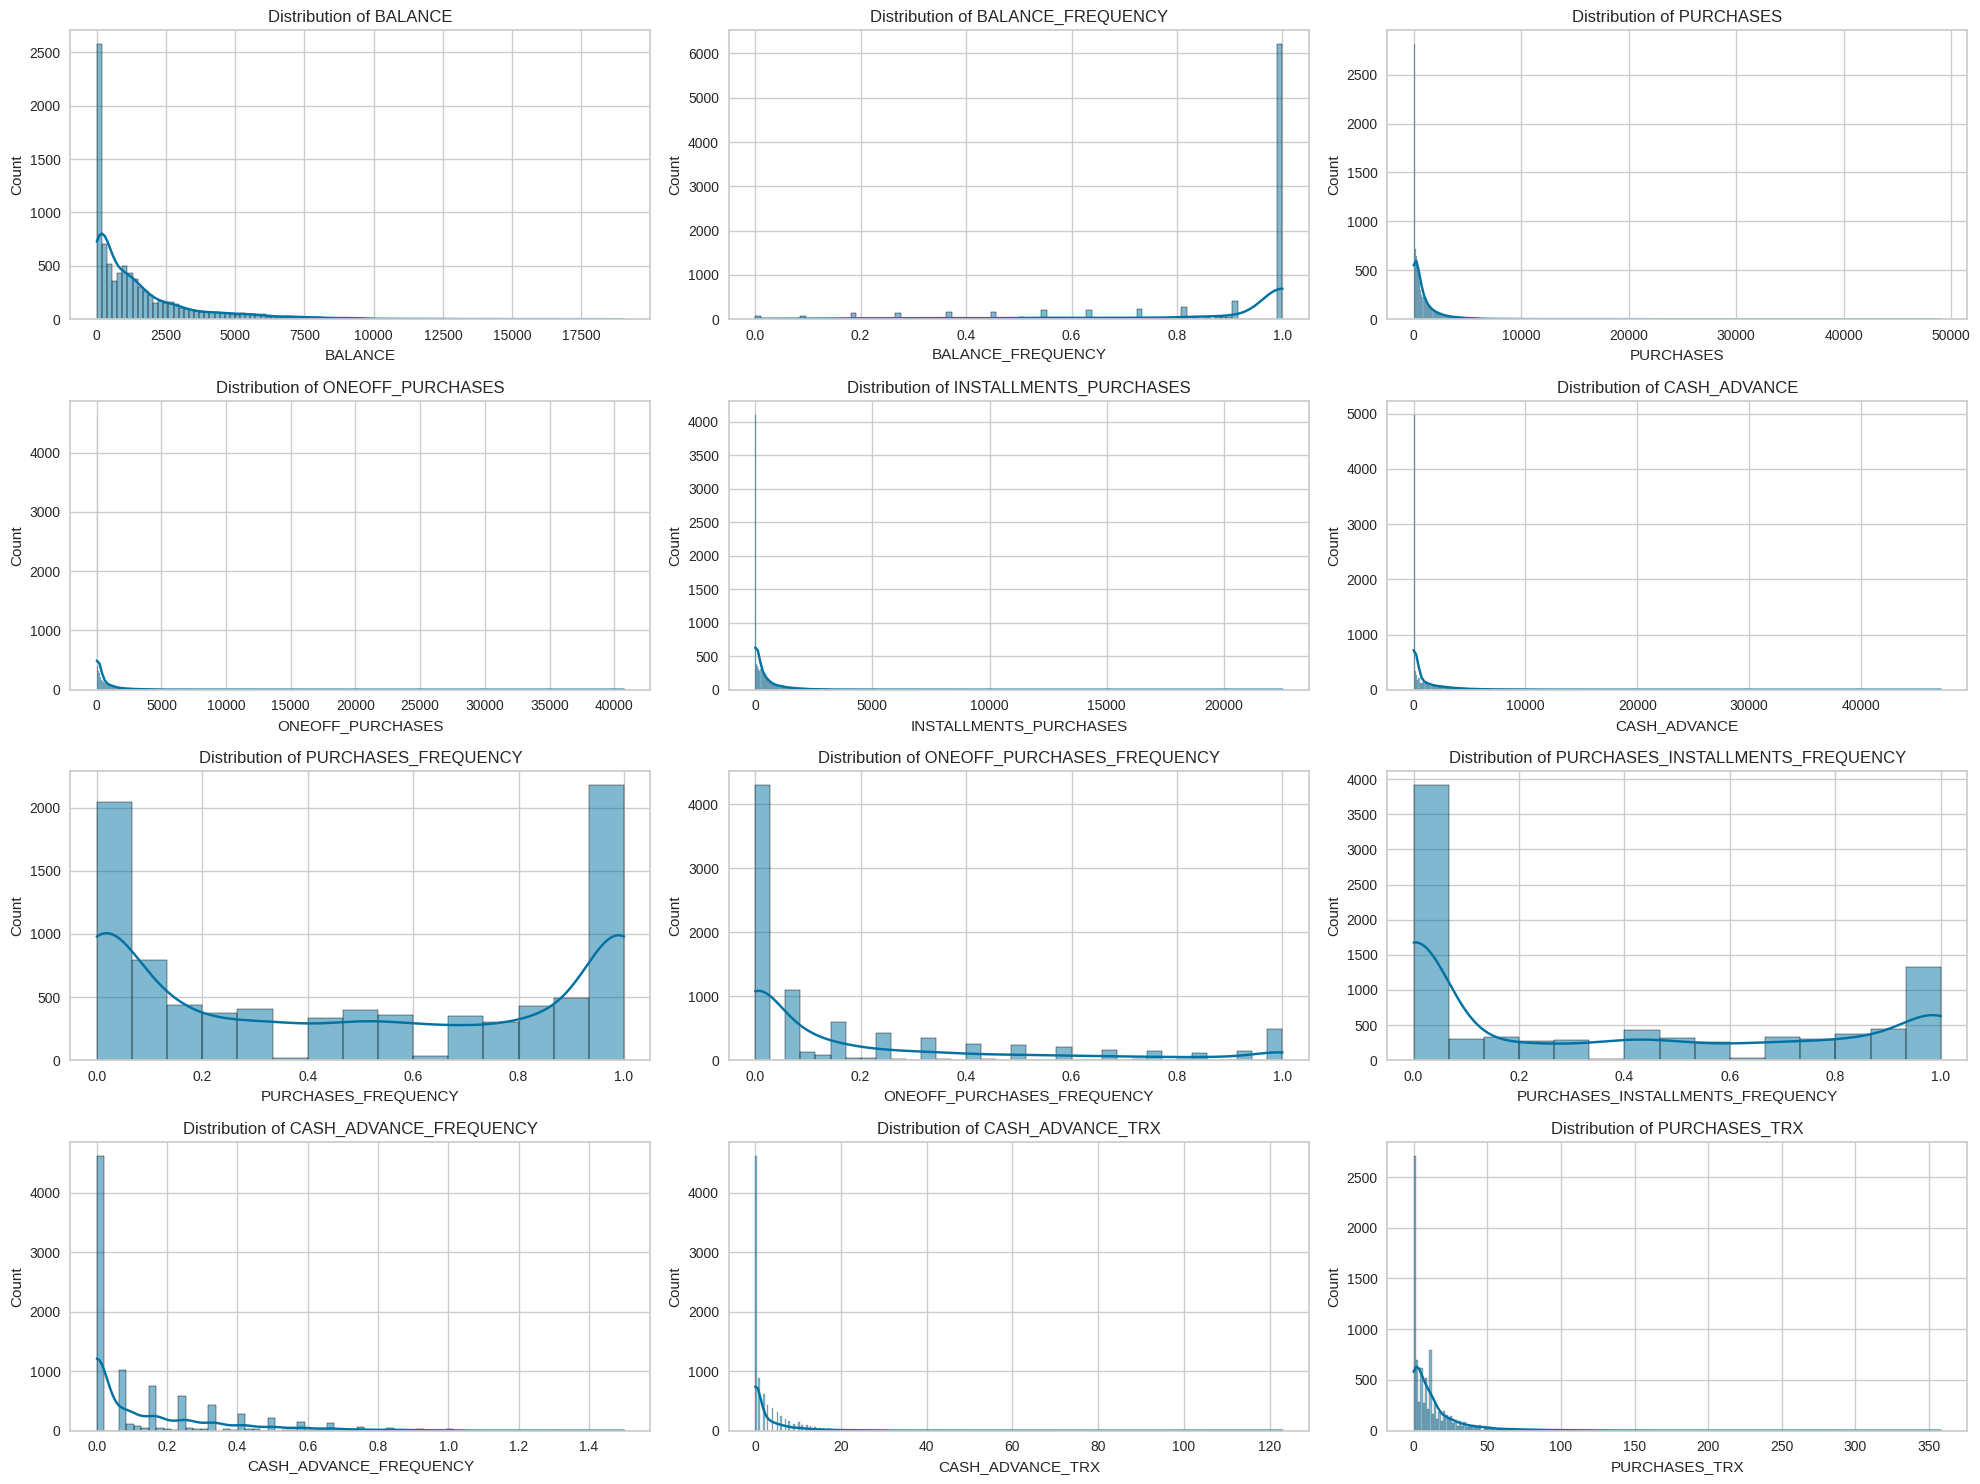

In [ ]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[:12], 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Outliers analysis

In [ ]:
# Percentile 5-95
def detect_outliers_percentile(df, column):
    p5 = df[column].quantile(0.05)
    p95 = df[column].quantile(0.95)
    outliers = df[(df[column] < p5) | (df[column] > p95)]
    return len(outliers)

numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Cluster']
outlier_results = {}

for col in numeric_cols:
    outlier_count = detect_outliers_percentile(df, col)
    outlier_pct = (outlier_count / len(df)) * 100
    outlier_results[col] = {'count': outlier_count, 'percentage': outlier_pct}
    print(f"{col:<25}: {outlier_count:>4} outliers ({outlier_pct:>5.1f}%)")

# Tìm features có outliers
features_with_outliers = [col for col, data in outlier_results.items() if data['count'] > 0]
print(f"\nFeatures with outliers: {len(features_with_outliers)}")

BALANCE                  :  896 outliers ( 10.0%)
BALANCE_FREQUENCY        :  351 outliers (  3.9%)
PURCHASES                :  448 outliers (  5.0%)
ONEOFF_PURCHASES         :  448 outliers (  5.0%)
INSTALLMENTS_PURCHASES   :  448 outliers (  5.0%)
CASH_ADVANCE             :  448 outliers (  5.0%)
PURCHASES_FREQUENCY      :    0 outliers (  0.0%)
ONEOFF_PURCHASES_FREQUENCY:    0 outliers (  0.0%)
PURCHASES_INSTALLMENTS_FREQUENCY:    0 outliers (  0.0%)
CASH_ADVANCE_FREQUENCY   :  359 outliers (  4.0%)
CASH_ADVANCE_TRX         :  418 outliers (  4.7%)
PURCHASES_TRX            :  441 outliers (  4.9%)
CREDIT_LIMIT             :  584 outliers (  6.5%)
PAYMENTS                 :  896 outliers ( 10.0%)
MINIMUM_PAYMENTS         :  896 outliers ( 10.0%)
PRC_FULL_PAYMENT         :    0 outliers (  0.0%)
TENURE                   :  394 outliers (  4.4%)

Features with outliers: 13


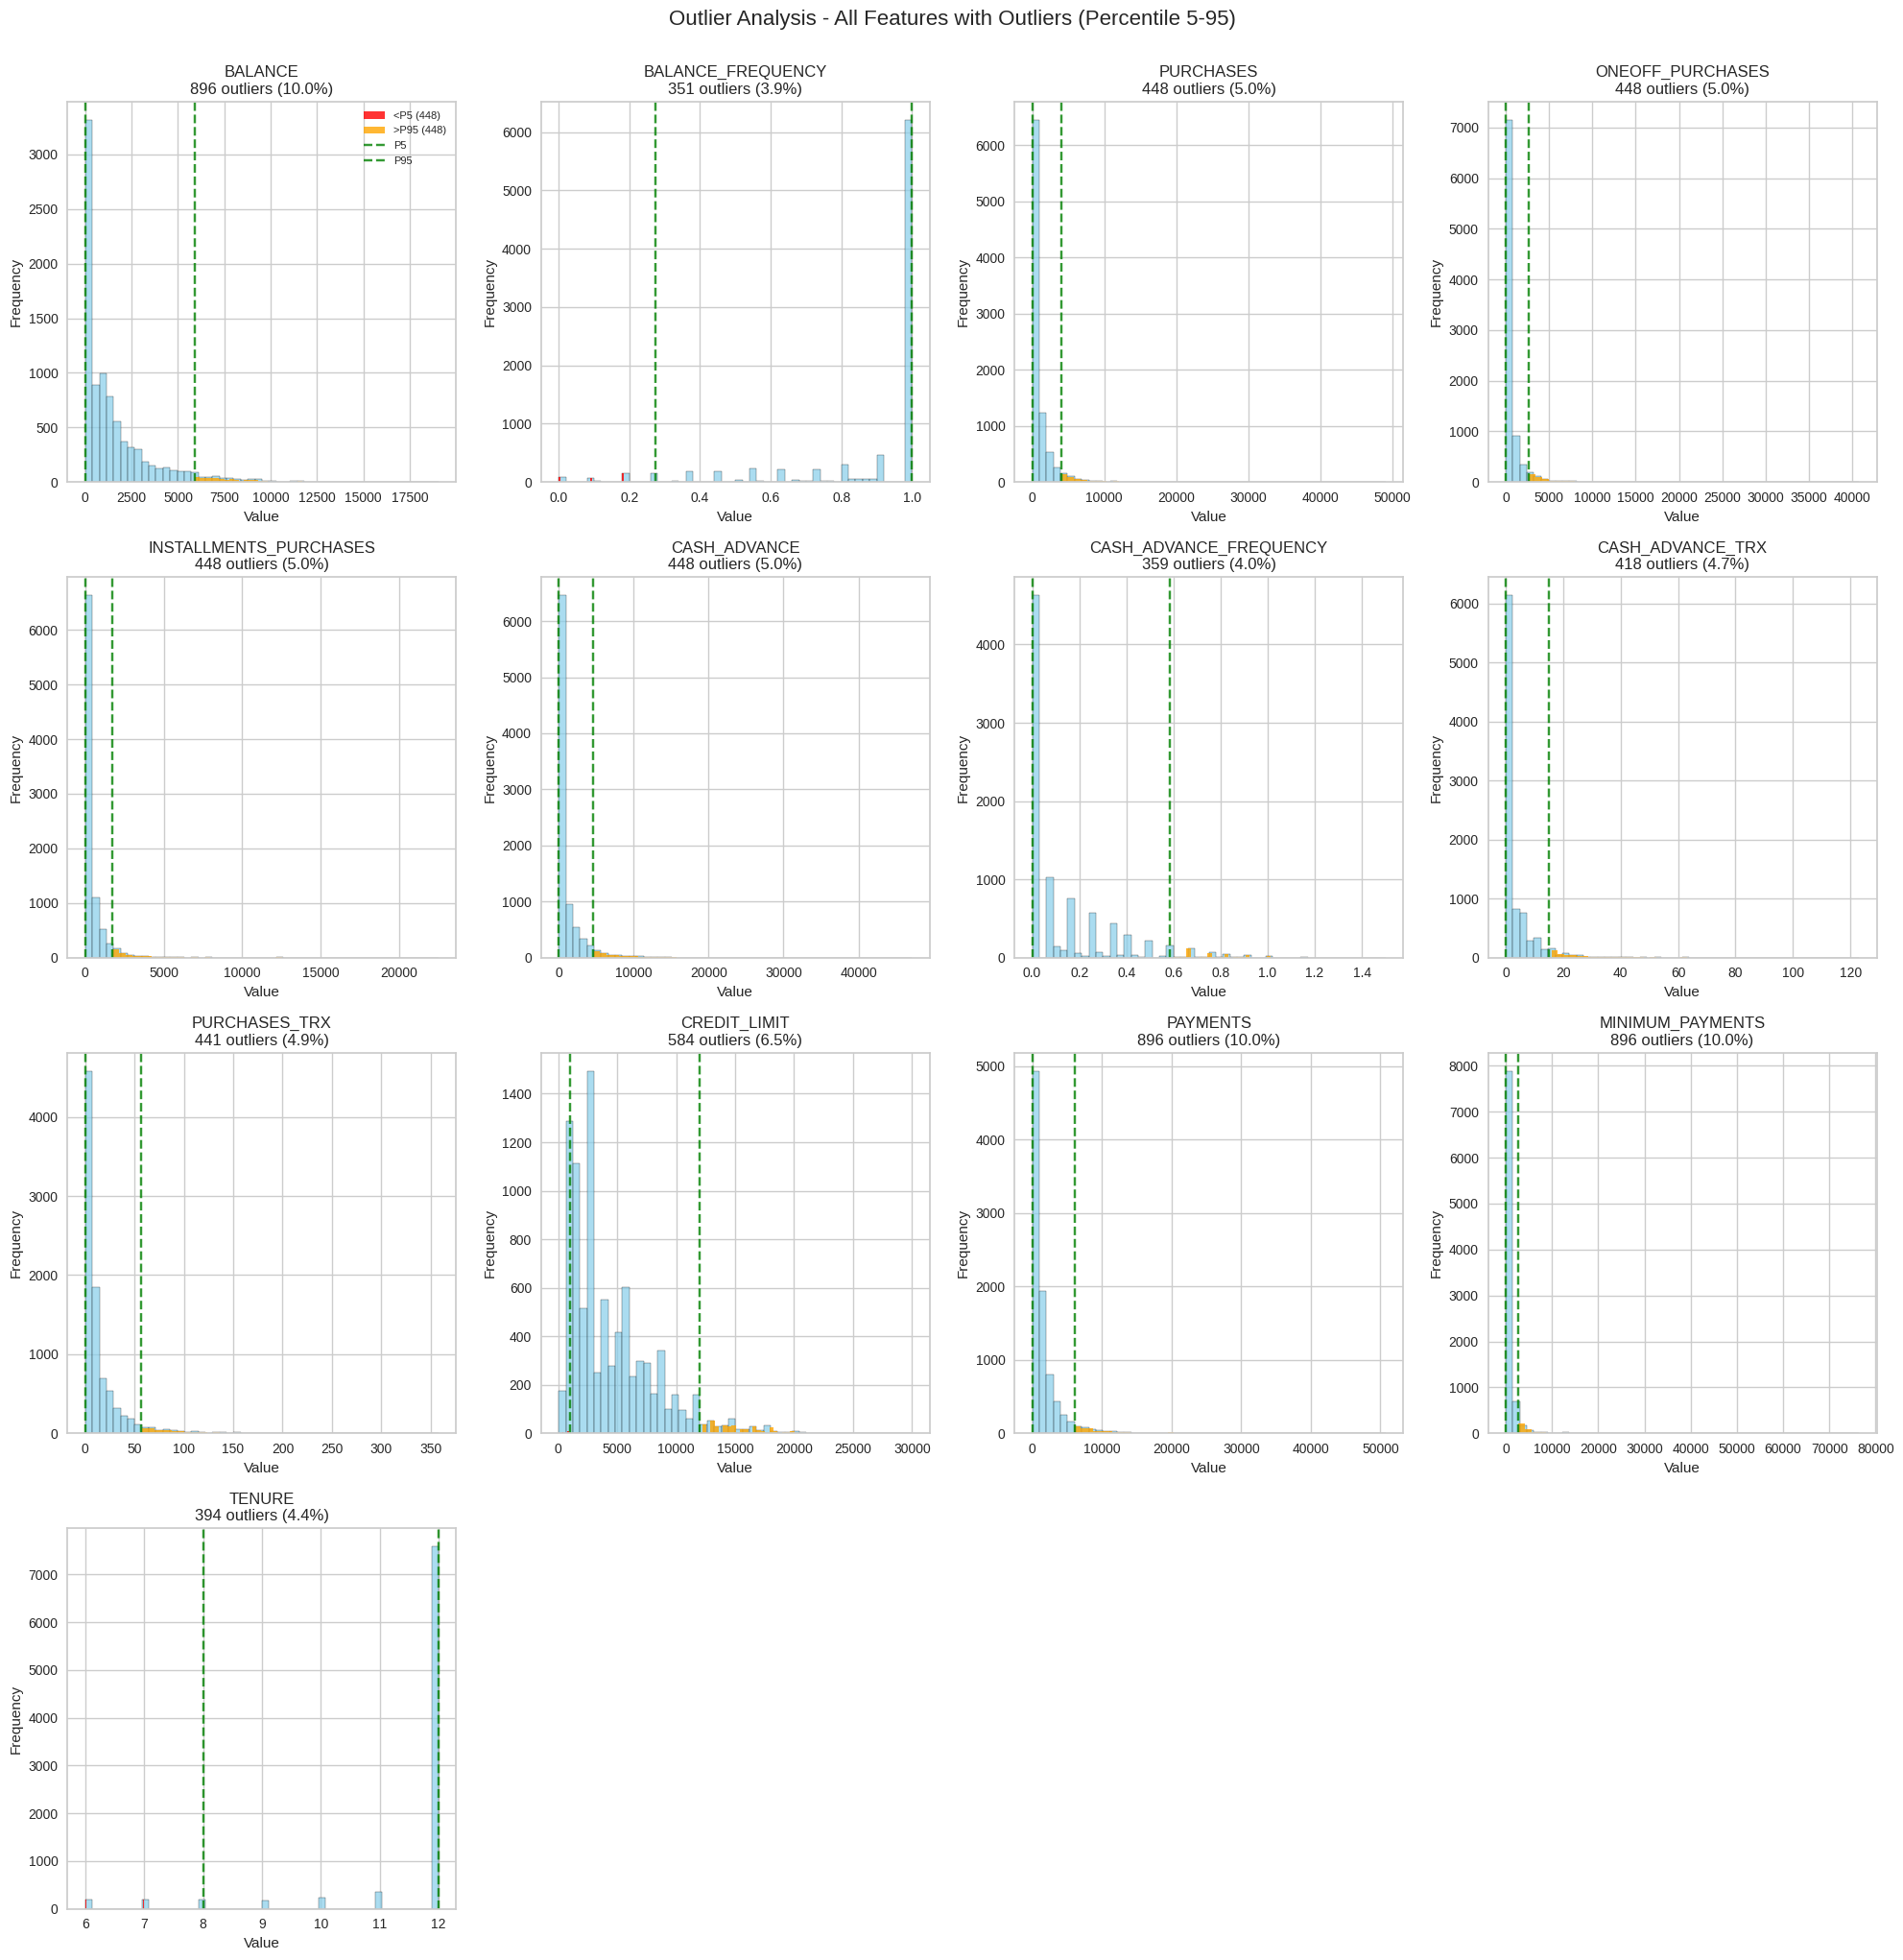

In [ ]:
# Plot outliers cho tất cả features có outliers
n_features = len(features_with_outliers)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(features_with_outliers):
    plt.subplot(n_rows, n_cols, i + 1)

    p5 = df[col].quantile(0.05)
    p95 = df[col].quantile(0.95)

    plt.hist(df[col], bins=50, alpha=0.7, color='skyblue', edgecolor='black')

    outliers_low = df[df[col] < p5][col]
    outliers_high = df[df[col] > p95][col]

    if len(outliers_low) > 0:
        plt.hist(outliers_low, bins=50, alpha=0.8, color='red', label=f'<P5 ({len(outliers_low)})')
    if len(outliers_high) > 0:
        plt.hist(outliers_high, bins=50, alpha=0.8, color='orange', label=f'>P95 ({len(outliers_high)})')

    plt.axvline(p5, color='green', linestyle='--', alpha=0.8, label='P5')
    plt.axvline(p95, color='green', linestyle='--', alpha=0.8, label='P95')

    # Labels and title
    outlier_pct = outlier_results[col]['percentage']
    plt.title(f'{col}\n{outlier_results[col]["count"]} outliers ({outlier_pct:.1f}%)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    if i == 0:
        plt.legend(fontsize=8)

plt.tight_layout()
plt.suptitle('Outlier Analysis - All Features with Outliers (Percentile 5-95)',
             fontsize=16, y=1.02)
plt.show()

- Phát hiện logic không hợp lý giữa PAYMENTS và MINIMUM_PAYMENTS (max PAYMENTS >  max MINIMUM_PAYMENTS)

In [ ]:
# Fix MINIMUM_PAYMENTS logic issue
df['MINIMUM_PAYMENTS'] = np.minimum(df['MINIMUM_PAYMENTS'], df['PAYMENTS'])

# Data Preprocessing

# Feature Engineering

### Xóa cột Cluster

In [ ]:
data = df.copy()
true_clusters = data['Cluster']
data = data.drop('Cluster', axis=1)

In [ ]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

# Model Part

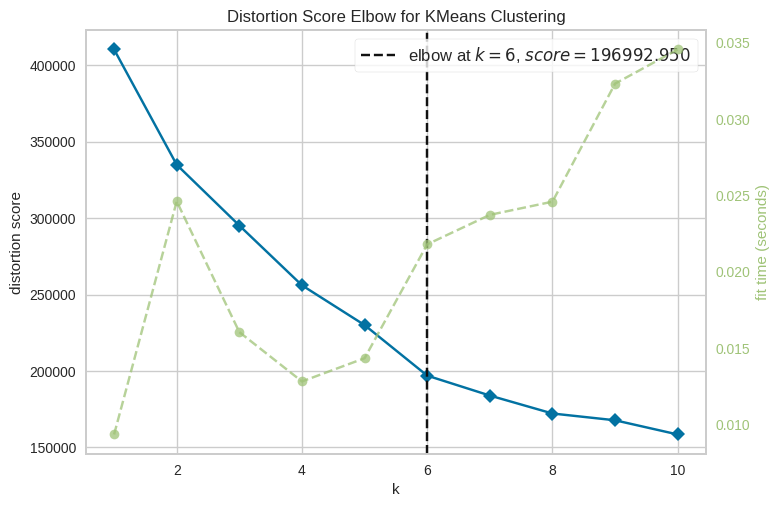

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow_method = KElbowVisualizer(KMeans(random_state=42), k=(1, 11))
elbow_method.fit(scaled_data)
elbow_method.show()

For n_clusters = 2, the silhouette score is 0.607
For n_clusters = 3, the silhouette score is 0.301
For n_clusters = 4, the silhouette score is 0.314
For n_clusters = 5, the silhouette score is 0.282
For n_clusters = 6, the silhouette score is 0.303
For n_clusters = 7, the silhouette score is 0.286
For n_clusters = 8, the silhouette score is 0.286
For n_clusters = 9, the silhouette score is 0.281
For n_clusters = 10, the silhouette score is 0.291


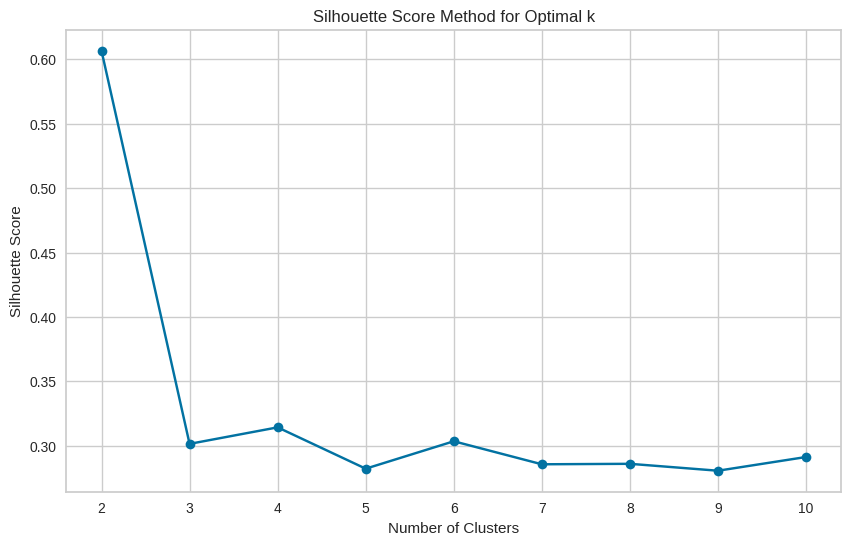

For n_clusters = 2, the Calinski-Harabasz score is 2014.938
For n_clusters = 3, the Calinski-Harabasz score is 1771.204
For n_clusters = 4, the Calinski-Harabasz score is 1825.396
For n_clusters = 5, the Calinski-Harabasz score is 1911.442
For n_clusters = 6, the Calinski-Harabasz score is 1937.667
For n_clusters = 7, the Calinski-Harabasz score is 1835.789
For n_clusters = 8, the Calinski-Harabasz score is 1767.655
For n_clusters = 9, the Calinski-Harabasz score is 1696.933
For n_clusters = 10, the Calinski-Harabasz score is 1652.880


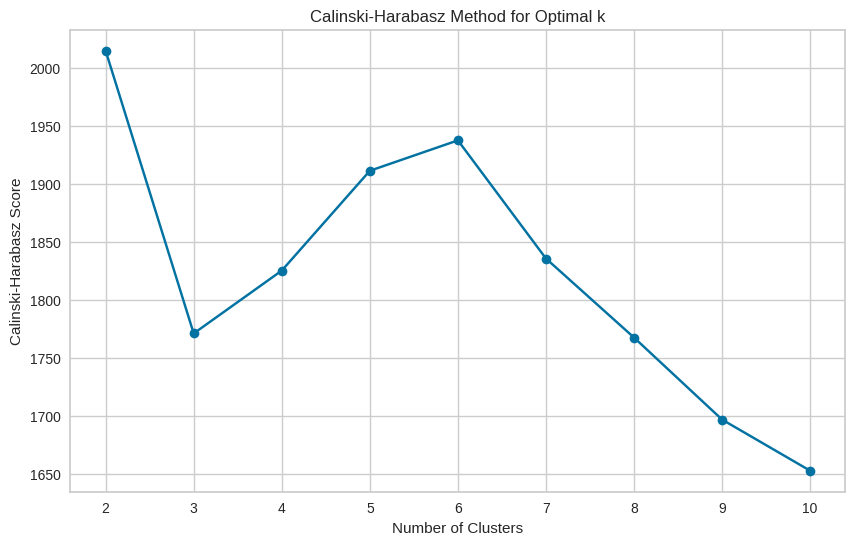

For n_clusters = 2, the Davies-Bouldin score is 1.193
For n_clusters = 3, the Davies-Bouldin score is 1.432
For n_clusters = 4, the Davies-Bouldin score is 1.247
For n_clusters = 5, the Davies-Bouldin score is 1.201
For n_clusters = 6, the Davies-Bouldin score is 1.141
For n_clusters = 7, the Davies-Bouldin score is 1.245
For n_clusters = 8, the Davies-Bouldin score is 1.267
For n_clusters = 9, the Davies-Bouldin score is 1.246
For n_clusters = 10, the Davies-Bouldin score is 1.211


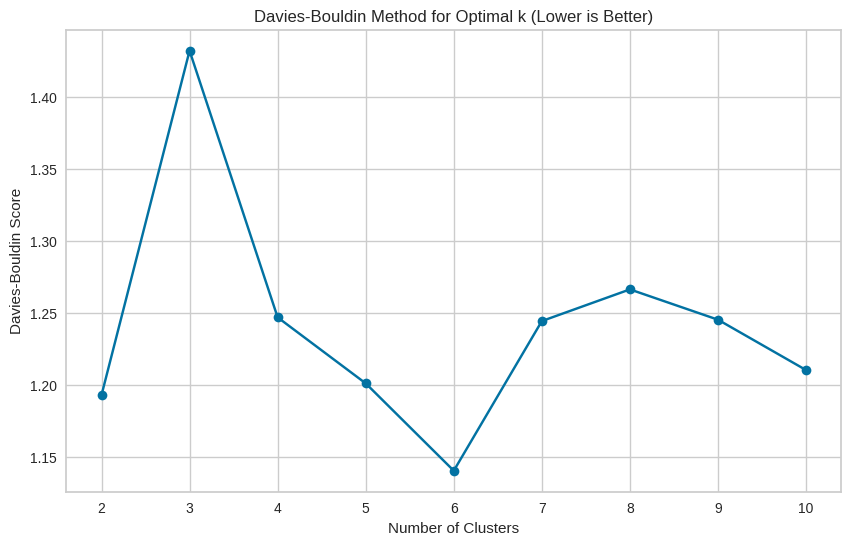

In [ ]:
# Silhouette Score Method
silhouette_scores = []
k_range = range(2, 11)  # Silhouette score requires at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method for Optimal k')
plt.grid(True)
plt.show()

# Calinski-Harabasz Index (Variance Ratio Criterion)
ch_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    ch_score = calinski_harabasz_score(scaled_data, cluster_labels)
    ch_scores.append(ch_score)
    print(f"For n_clusters = {k}, the Calinski-Harabasz score is {ch_score:.3f}")

# Plot Calinski-Harabasz Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Method for Optimal k')
plt.grid(True)
plt.show()

# Davies-Bouldin Index
db_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    db_score = davies_bouldin_score(scaled_data, cluster_labels)
    db_scores.append(db_score)
    print(f"For n_clusters = {k}, the Davies-Bouldin score is {db_score:.3f}")

# Plot Davies-Bouldin Scores (lower is better)
plt.figure(figsize=(10, 6))
plt.plot(k_range, db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Method for Optimal k (Lower is Better)')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 4

kmeans_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42, n_init=10))
])

kmeans_model = kmeans_pipeline.fit(data)

# Get cluster labels
cluster_labels = kmeans_pipeline.named_steps['kmeans'].labels_

# Add cluster labels to the original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Display the count of data points in each cluster
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
print("Number of data points in each cluster:")
print(cluster_counts)

# Calculate cluster centers (in original feature space)
centers_scaled = kmeans_pipeline.named_steps['kmeans'].cluster_centers_
centers = kmeans_pipeline.named_steps['scaler'].inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers, columns=data.columns)
print("\nCluster Centers:")
display(centers_df)

Number of data points in each cluster:
Cluster
0     806
1    6869
2    1250
3      25
Name: count, dtype: int64

Cluster Centers:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2445.601153,0.978232,4829.189603,3103.775985,1726.217831,484.059602,0.926871,0.691132,0.720116,0.063332,1.551425,62.785626,7808.364312,4541.629592,971.256578,0.312203,11.889715
1,927.875925,0.849709,555.008433,279.076923,276.210188,385.865251,0.472866,0.155562,0.350926,0.084271,1.516308,9.852650,3553.497093,961.312215,346.147942,0.154570,11.488789
2,4419.645366,0.961876,479.514048,274.558088,205.054896,4546.342986,0.296156,0.131777,0.201761,0.462592,13.880800,8.048800,7303.643636,3647.708136,1367.656517,0.039222,11.425600
3,5249.640708,0.959636,26813.470800,21506.773200,5306.697600,1488.363253,0.912667,0.845333,0.728667,0.056667,2.400000,130.240000,15560.000000,27384.597243,3148.432703,0.527424,11.920000


## PCA

### 3 dimensional PCA

In [ ]:
pca_3d = PCA(n_components=3)
pca_3d_df = pd.DataFrame(pca_3d.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

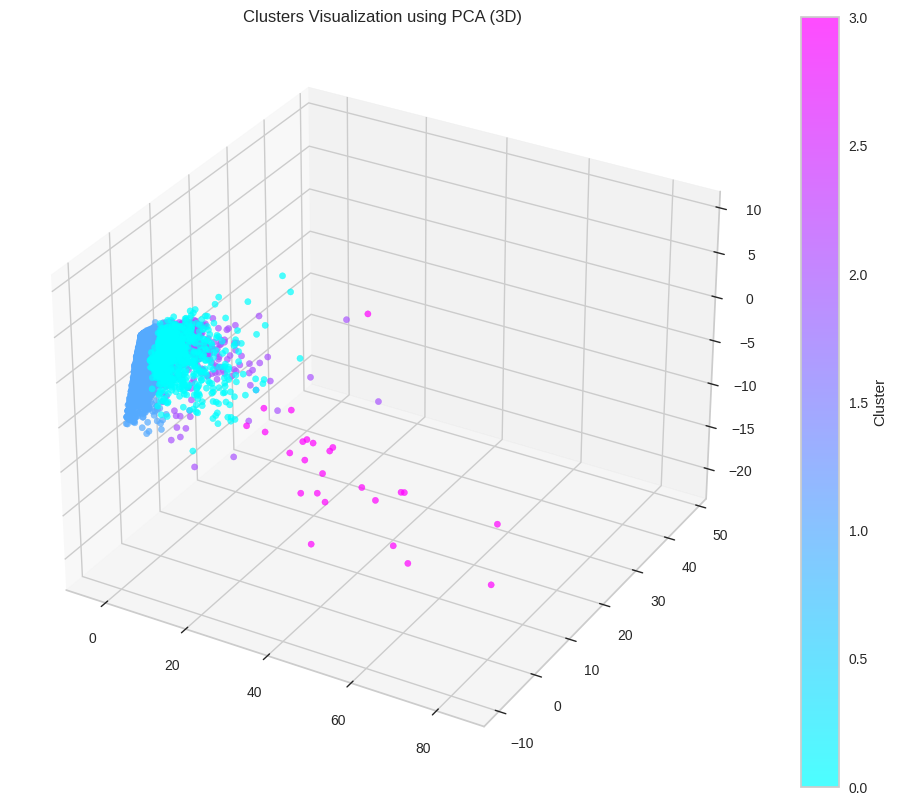

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(pca_3d_df.pca_1, pca_3d_df.pca_2, pca_3d_df.pca_3,
                     c=cluster_labels, cmap='cool', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
ax.set_title('Clusters Visualization using PCA (3D)')
plt.show()

### 2 dimensional PCA


In [ ]:
pca_2d = PCA(n_components=2)
pca_2d.fit(scaled_data)
pca_2d_df = pd.DataFrame(pca_2d.transform(scaled_data), columns=["pca1", "pca2"])

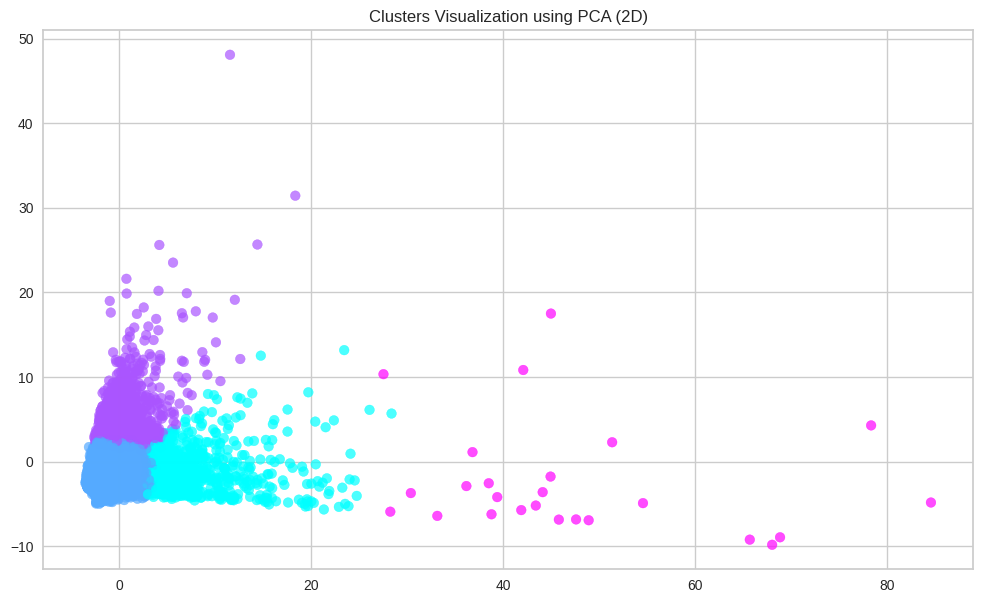

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_2d_df.pca1, pca_2d_df.pca2, c=cluster_labels, cmap="cool", alpha=0.7)
plt.title('Clusters Visualization using PCA (2D)')
plt.show()

<ipython-input-180-c0ddc898ab11>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_2d_df.iloc[index].pca1, pca_2d_df.iloc[index].pca2, label=g, cmap="cool")


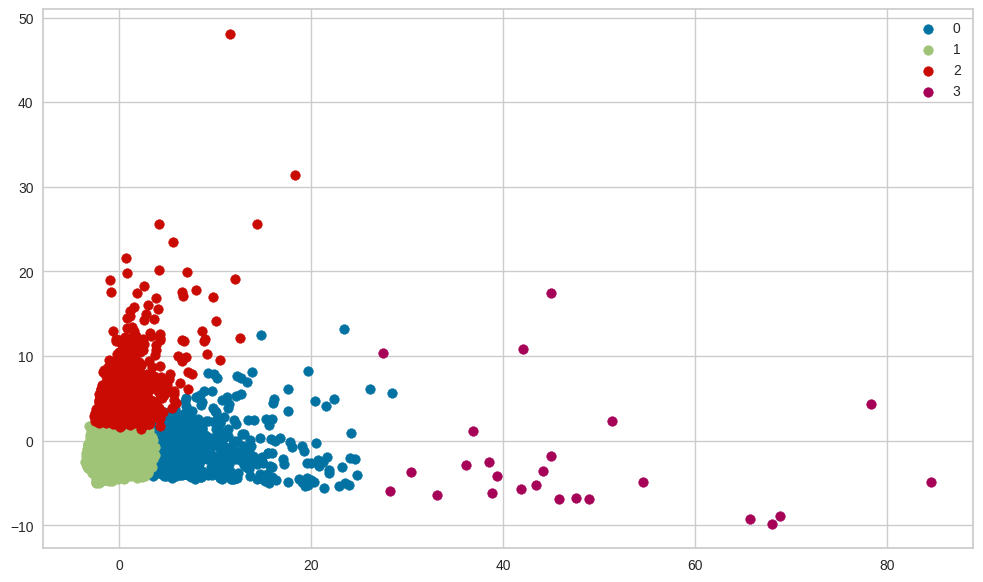

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
group = kmeans_pipeline.named_steps['kmeans'].labels_

for g in np.unique(group):
    index = np.where(group==g)
    ax.scatter(pca_2d_df.iloc[index].pca1, pca_2d_df.iloc[index].pca2, label=g, cmap="cool")
ax.legend()
plt.show()

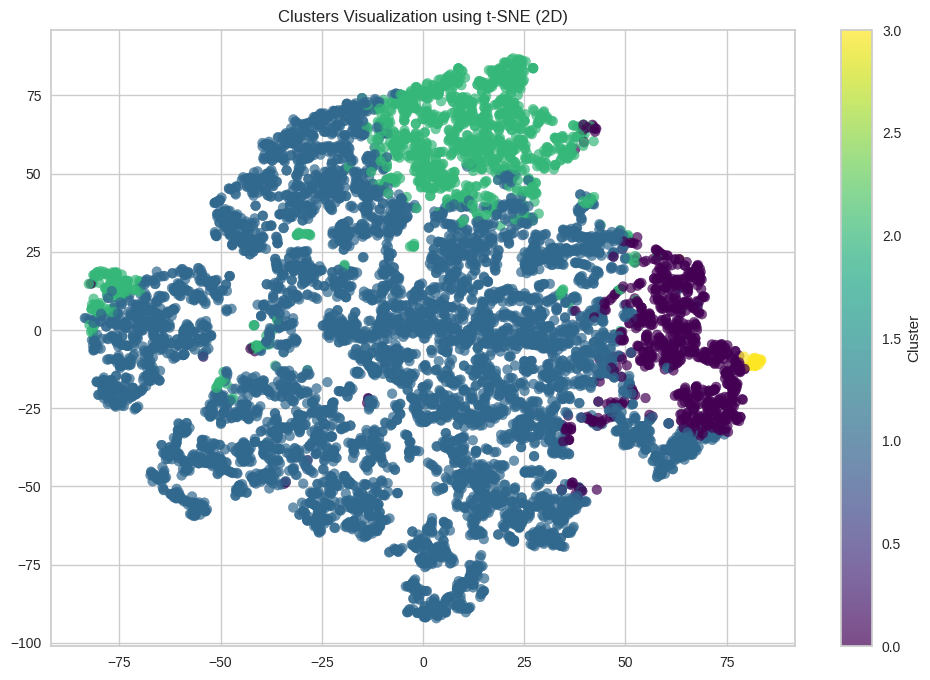

In [ ]:
# t-SNE visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(scaled_data)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters Visualization using t-SNE (2D)')
plt.show()

In [ ]:
# Calculate clustering performance metrics
silhouette_avg = silhouette_score(scaled_data, cluster_labels)
ch_score = calinski_harabasz_score(scaled_data, cluster_labels)
db_score = davies_bouldin_score(scaled_data, cluster_labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Score: {ch_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")

# Compare with other clustering algorithms
# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agglomerative.fit_predict(scaled_data)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Calculate metrics for each algorithm
metrics = {
    'Algorithm': ['KMeans', 'Agglomerative', 'DBSCAN'],
    'Silhouette Score': [
        silhouette_score(scaled_data, cluster_labels),
        silhouette_score(scaled_data, agg_labels),
        silhouette_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan')
    ],
    'Calinski-Harabasz Score': [
        calinski_harabasz_score(scaled_data, cluster_labels),
        calinski_harabasz_score(scaled_data, agg_labels),
        calinski_harabasz_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan')
    ],
    'Davies-Bouldin Score': [
        davies_bouldin_score(scaled_data, cluster_labels),
        davies_bouldin_score(scaled_data, agg_labels),
        davies_bouldin_score(scaled_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan')
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df

Silhouette Score: 0.314
Calinski-Harabasz Score: 1825.396
Davies-Bouldin Score: 1.247


,Algorithm,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
0,KMeans,0.314293,1825.396130,1.247218
1,Agglomerative,0.284675,1644.101190,1.306076
2,DBSCAN,-0.434762,16.768649,1.366110


# Discussion & Conclusion

- Số lượng cụm: k=6 là lựa chọn thông qua biểu đồ K elbow, chỉ số Davies-Bouldin và chỉ số Calinski-Harabasz.
- Đánh giá:
  - Điểm Silhouette là 0.303, cho thấy cấu trúc cụm ở mức trung bình, không quá mạnh nhưng cũng không quá yếu.
  - Chỉ số Calinski-Harabasz đạt 1937.667, cao hơn so với phương pháp Agglomerative, chứng tỏ KMeans tạo ra các cụm có mật độ tốt hơn.
  - Chỉ số Davies-Bouldin là 1.141, thấp hơn so với các phương pháp khác, cho thấy các cụm được tách biệt tương đối tốt.
- Tuy nhiên khi nhìn vào biểu đồ trực quan thì dễ dàng thấy có sự chồng chéo giữa các cụm với nhau, có thể gây khó khăn trong việc giải thích ý nghĩa của mỗi cụm.
- Kết quả với k=4 lại cho ra tốt hơn